In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [21]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [71]:
galaxy_j5 = df_events.loc[(df_events["model"] == "Samsung Galaxy J5") & (df_events["event"] == "conversion"),:]
galaxy_j5 = galaxy_j5[["city","region","country","event","timestamp","condition"]]
galaxy_j5.head()

,city,region,country,event,timestamp,condition
6985,NaN,NaN,NaN,conversion,2018-02-09 22:07:07,Bom
18502,NaN,NaN,NaN,conversion,2018-01-10 18:59:05,Muito Bom
20959,NaN,NaN,NaN,conversion,2018-04-21 18:54:14,Excelente
37398,NaN,NaN,NaN,conversion,2018-04-29 13:18:15,Bom
50967,NaN,NaN,NaN,conversion,2018-03-13 12:24:21,Muito Bom


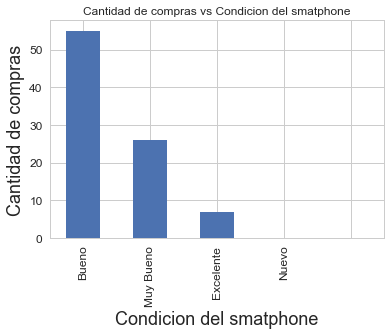

In [72]:
condition = galaxy_j5["condition"].value_counts()

ax = condition.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del smatphone",figsize =(6,4),legend = False, fontsize = 12)
ax.set_xlabel("Condicion del smatphone", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
ax.set_xticklabels(["Bueno","Muy Bueno","Excelente","Nuevo"])
plt.show()

In [120]:
dias

979074      5
818588      7
818593      7
961704      9
18502      10
981909     30
981922     31
312200     31
917162     31
917163     31
917164     31
961814      8
6985        9
383120     15
50967      13
135442     13
842862     15
961956     16
658226     18
658229     18
658232     18
658247     18
872072     23
572642     23
572644     23
608920     24
714788     26
265527     26
677389     27
658379      1
           ..
728985      7
432034      9
361533      9
65880      10
728855     10
663819     10
91560      12
979561     12
80154      13
80169      13
950566     14
971394     14
357671     14
971396     15
229096     15
169269     15
460876     16
971398     17
971399     17
971401     17
971402     17
971403     17
971404     18
730652     18
547838     21
619168     22
1004441    28
860642     29
958528     29
457404      6
Name: timestamp, Length: 88, dtype: int64

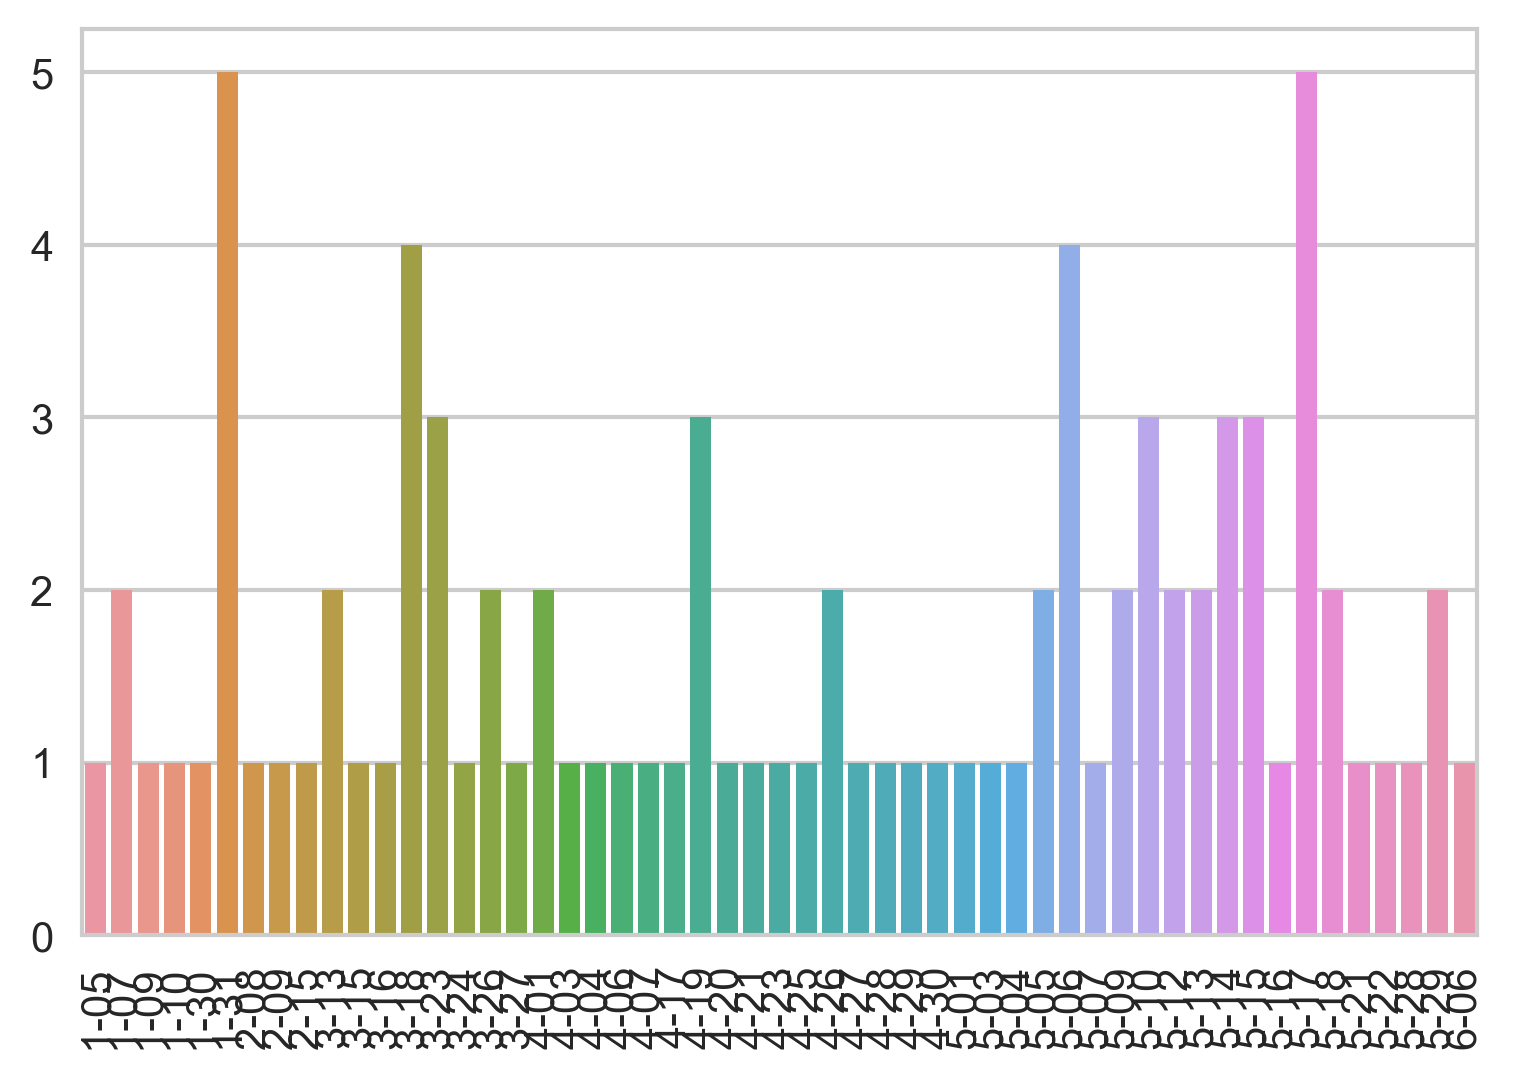

In [154]:
galaxy_j5['dia_mes'] = galaxy_j5['timestamp'].apply(lambda x: x.split(' ')[0][-5:])
#galaxy_j5.sort_values(by = galaxy)
fechas = galaxy_j5['dia_mes'].value_counts()
#fechas  = fechas.to_frame(name = "Fechas").reset_index()
fechas
#fechas.columns= [["Fecha","Frecuencia"]]
#fechas.sort_values(fechas["Fecha"])
fechas
#fechas.sort(fechas.index)

fechas = galaxy_j5.sort_values(by = "timestamp",ascending = True)["timestamp"]
meses=pd.to_datetime(fechas).dt.month
dias=pd.to_datetime(fechas).dt.day
serie_final=meses.map(lambda x: str(x))+'-'+dias.map(lambda x: str(x) if x>9 else "0"+str(x))
serie_final=serie_final.value_counts().sort_index()
#galaxy_j5["mes"] = pd.to_datetime(galaxy_j5["timestamp"]).dt.month
#galaxy_j5["dia"] = pd.to_datetime(galaxy_j5["timestamp"]).dt.day
#galaxy_j5
#ax = serie_final.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del smatphone",figsize =(18,5),legend = False, fontsize = 12)

plt.rc('figure',dpi=300)
g=sns.barplot(x=serie_final.index,y=serie_final.values)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
plt.show()


In [141]:
serie_final

979074     1-05
818588     1-07
818593     1-07
961704     1-09
18502      1-10
981909     1-30
981922     1-31
312200     1-31
917162     1-31
917163     1-31
917164     1-31
961814     2-08
6985       2-09
383120     2-15
50967      3-13
135442     3-13
842862     3-15
961956     3-16
658226     3-18
658229     3-18
658232     3-18
658247     3-18
872072     3-23
572642     3-23
572644     3-23
608920     3-24
714788     3-26
265527     3-26
677389     3-27
658379     4-01
           ... 
728985     5-07
432034     5-09
361533     5-09
65880      5-10
728855     5-10
663819     5-10
91560      5-12
979561     5-12
80154      5-13
80169      5-13
950566     5-14
971394     5-14
357671     5-14
971396     5-15
229096     5-15
169269     5-15
460876     5-16
971398     5-17
971399     5-17
971401     5-17
971402     5-17
971403     5-17
971404     5-18
730652     5-18
547838     5-21
619168     5-22
1004441    5-28
860642     5-29
958528     5-29
457404     6-06
Name: timestamp, Length: